<a href="https://colab.research.google.com/github/rutuja-patil24/CMPE-258-Deep_Learning/blob/main/Assignment_07/Part_2_08_Custom_Layers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
# Step 1: Define Custom Layers
class MyDense(layers.Layer):
    def __init__(self, units):
        super().__init__()
        self.units = units

    def build(self, input_shape):
        self.kernel = self.add_weight(name="kernel", shape=[input_shape[-1], self.units])
        self.bias = self.add_weight(name="bias", shape=[self.units])

    def call(self, inputs):
        return tf.matmul(inputs, self.kernel) + self.bias

class AddGaussianNoise(layers.Layer):
    def __init__(self, stddev=0.1):
        super().__init__()
        self.stddev = stddev

    def call(self, inputs, training=False):
        if training:
            noise = tf.random.normal(shape=tf.shape(inputs), stddev=self.stddev)
            return inputs + noise
        return inputs

class ExponentialLayer(layers.Layer):
    def call(self, inputs):
        return tf.exp(inputs)

In [5]:
# Step 2: Load and preprocess data
housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Step 3: Build Model
model = keras.Sequential([
    AddGaussianNoise(0.1),
    MyDense(64),
    layers.ReLU(),
    MyDense(32),
    ExponentialLayer(),
    MyDense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [7]:
# Step 4: Train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32)

Epoch 1/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 80052645527552.0000 - mae: 69179.2812 - val_loss: 228221812736.0000 - val_mae: 7436.1758
Epoch 2/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10848124796928.0000 - mae: 38290.2500 - val_loss: 510867.1562 - val_mae: 11.8036
Epoch 3/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 258534976.0000 - mae: 97.4556 - val_loss: 731696332800.0000 - val_mae: 13314.2139
Epoch 4/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 176167344.0000 - mae: 91.8131 - val_loss: 144615216.0000 - val_mae: 187.7339
Epoch 5/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 249617056.0000 - mae: 165.3515 - val_loss: 248373056.0000 - val_mae: 245.8428
Epoch 6/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 43057980.0000 - mae: 41.0736 - val_loss: 305322912.0000 - val_mae: 272.5050
Epoch 7/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 139663.0469 - mae: 5.3511 - val_loss: 358867296.0000 - val_mae: 295.3854
Epoch 8/30
516/516 ━━━━━

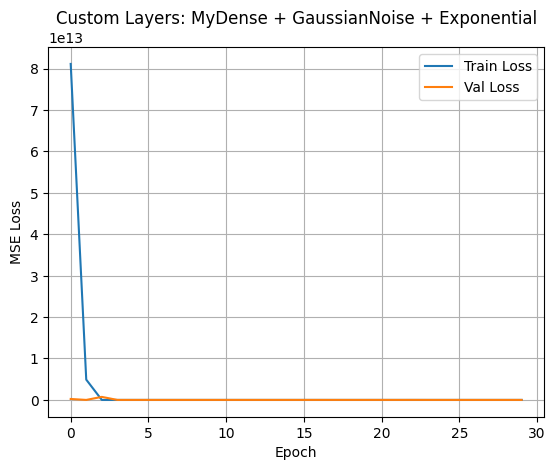

In [8]:
# Step 5: Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Custom Layers: MyDense + GaussianNoise + Exponential")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.legend()
plt.show()